# Titanic
I've choose this dataset for the visualizations Project to communicate data findings. this dataset have records of the passengers who were in the Titanic backthen, it's from kaggle and it's manly for machine learning. but i find it very neat and will be good for the visualizations purpurses of this project as i manged to get intersiting qustions as listd below

# Questions
- Did most people surived or not ?
- What factors affects the chance of survivng ?
- Do higher classes have higher chances of surviving ?
- Who have more chance of survivng, men or women ?
- Do solo travellers have less chances of survivng ?
- Do yenger people have more chance of survivng ?
- Do wealthier people have more chance of surviving ?



# Preparing the Dataset 

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
# read nessery libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_csv('/content/gdrive/MyDrive/pisa/train.csv')
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- we have some missing values in age, cabin and embarked columns
- and we need to change Survived and Pclass columns to catogorcal

In [6]:
# changing Survived and Pclass columns to catogorcal
df['Pclass']= df['Pclass'].astype(str)
df['Survived']= df['Survived'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [8]:
# changing some value names
df["Pclass"].replace({"1": "class1", "2": "class2","3": 'class3'}, inplace=True)
df["Survived"].replace({"1": "Yes", "0": "No"}, inplace=True)

In [9]:
df.rename(columns={'SibSp': 'Number of siblings', 'Parch': 'Number of parents/children'}, inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Number of siblings,Number of parents/children,Ticket,Fare,Cabin,Embarked
0,1,No,class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
na_counts = df.isnull().sum()
na_counts

PassengerId                     0
Survived                        0
Pclass                          0
Name                            0
Sex                             0
Age                           177
Number of siblings              0
Number of parents/children      0
Ticket                          0
Fare                            0
Cabin                         687
Embarked                        2
dtype: int64

In [12]:
# changing the figure size so it's not too small
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,7

c:\users\eslam\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


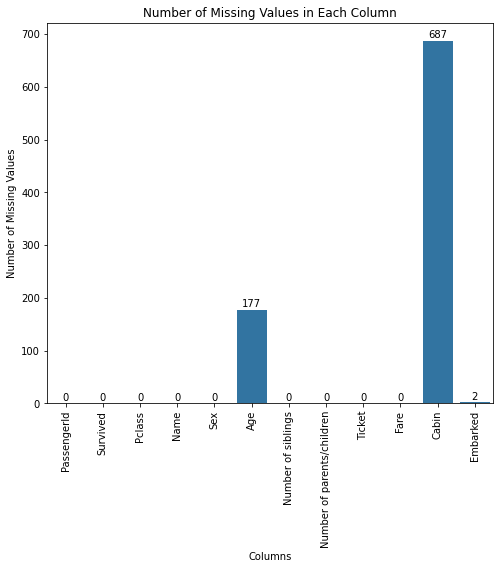

In [13]:
# Setting the base color
color_base = sb.color_palette()[0]
# Ploting number of missing values
sb.barplot(na_counts.index.values, na_counts, color = color_base);

# rotate the test in x axis
plt.xticks(rotation=90);

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+21, count, ha = 'center', va='top');

plt.title('Number of Missing Values in Each Column');
plt.xlabel('Columns');
plt.ylabel('Number of Missing Values');

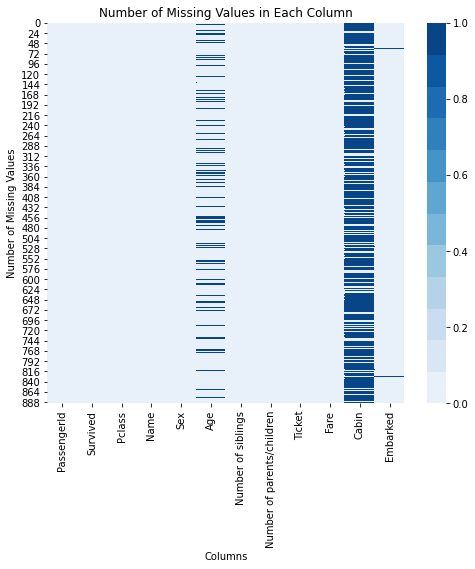

In [14]:
# plting a heat map for the missing values
colormap = sb.color_palette("Blues",12)
sb.heatmap(df.isnull(), cmap=colormap);

plt.title('Number of Missing Values in Each Column');
plt.xlabel('Columns');
plt.ylabel('Number of Missing Values');

we can now see tha missing vlues more clearly 

- hence we have 177 missing values in age column, I'm gonna drop them
- and hence we have 687 missing values in cabin column, I'm gona drop this column

In [15]:
# droping cabin column
df = df.drop(columns='Cabin')
# droping null values
df = df.dropna(subset=['Age','Embarked'])

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Number of siblings,Number of parents/children,Ticket,Fare,Embarked
0,1,No,class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Yes,class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,No,class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
# no null values
df.isnull().sum()

PassengerId                   0
Survived                      0
Pclass                        0
Name                          0
Sex                           0
Age                           0
Number of siblings            0
Number of parents/children    0
Ticket                        0
Fare                          0
Embarked                      0
dtype: int64

In [18]:
# no duplicated data
df.duplicated().sum()

0

# Univariate Relationships




in this section of univariate I'm analysing the univariate varibles and answering the first question.

## Did most people surived or not ?

it turned out that most people didn't survived, 424 didn't and 288 did.

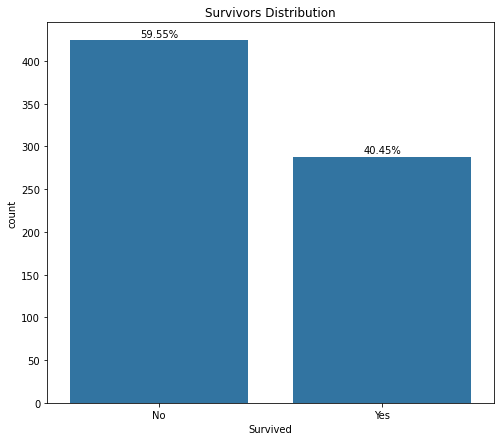

In [19]:
# plting the count or frequency of the survived column
color_base = sb.color_palette()[0]
sb.countplot(data = df, x='Survived', color = color_base);

# calculating the survived_counts
survived_counts = df['Survived'].value_counts()


# Logic to print value on each bar
for i in range (survived_counts.shape[0]):
    count = survived_counts[i]
    plt.text(i, count+13, str(round((count/df.shape[0])*100,2)) + '%', ha = 'center', va='top');

plt.title("Survivors Distribution");

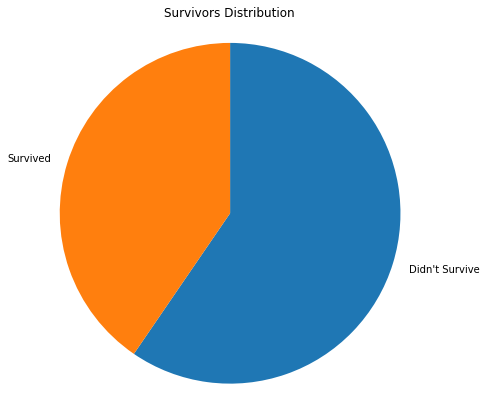

In [20]:
# we can see the same result in a pie chart too
sorted_counts = df['Survived'].value_counts()
plt.pie(sorted_counts,labels = ["Didn't Survive","Survived"], startangle=90, counterclock=False);
plt.axis('square');
plt.title('Survivors Distribution');

**We can see that more people didn't survived**

## Age Distribution

The majority are between 20 and 40

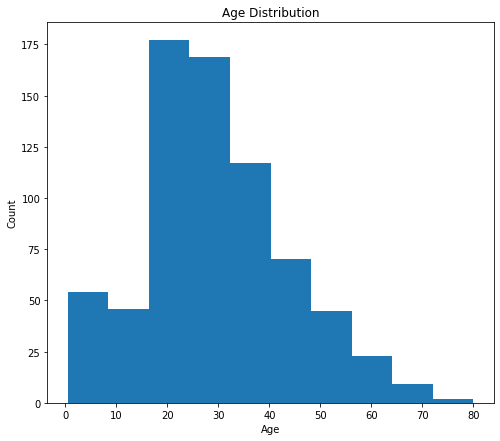

In [21]:
# takeing a look at the age distribution
plt.hist(data = df, x='Age');

plt.title('Age Distribution');
plt.xlabel('Age');
plt.ylabel('Count');

the majority of people are aproxmitly of age from 19 to 35.

we can see this better throgh a box plot or a Violin plot

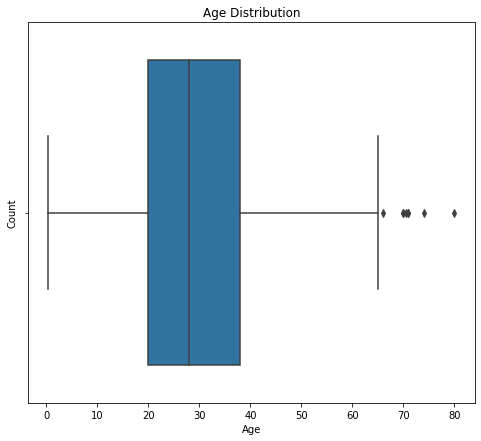

In [22]:
# takeing a look at the age distribution
color_base = sb.color_palette()[0]
sb.boxplot(data=df, x='Age', color=color_base);

plt.title('Age Distribution');
plt.ylabel('Count');

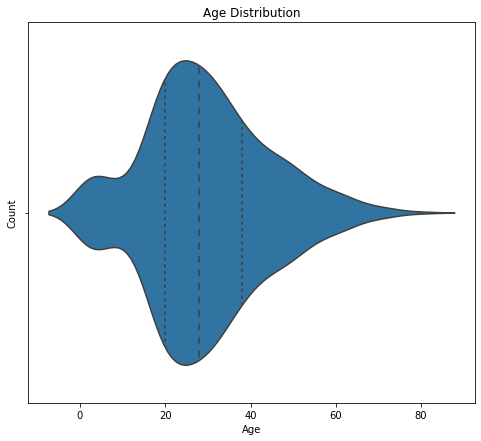

In [23]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='Age', color=base_color, inner='quartile')

plt.title('Age Distribution');
plt.ylabel('Count');

Now it's clear that majority are between 20 and 40, and this long tail may sugest presence of outliers too

In [24]:
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

this 0.4 may be a child, and 80 is an old person. so no outliers 

## Fare Distribution

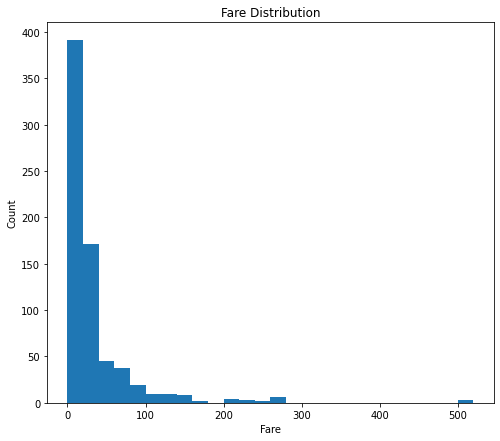

In [25]:
# takeing a look at the fare distribution

# comtroling the number of bins to visulize the data better
bins = np.arange(0, df['Fare'].max() +20, 20);

plt.hist(data = df, x='Fare', bins = bins);

plt.title('Fare Distribution');
plt.xlabel('Fare');
plt.ylabel('Count');

we might consider limiting the x axis to see the distribution better, as this now sugeset that outliers may exist in th Fare column

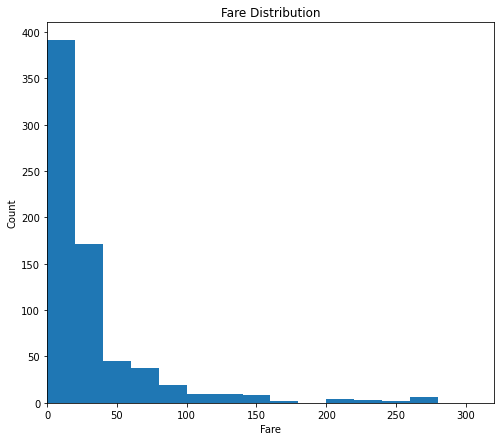

In [26]:
# comtroling the number of bins to visulize the data better
bins = np.arange(0, 320 +20, 20);

plt.hist(data = df, x='Fare', bins = bins);
plt.xlim(0,320);

plt.title('Fare Distribution');
plt.xlabel('Fare');
plt.ylabel('Count');

The Fare data is squeed to the right and this is tipicly normal with the finance stuff. the majorty are in the left (low fare)(majority of people), and small group of people with high fare to the left.

## Class Distribution

Majority of people are from class 3 (expected)

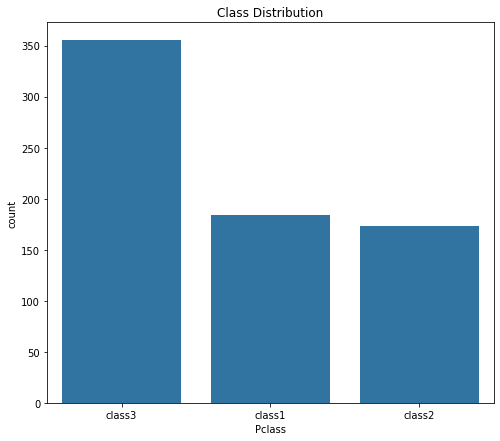

In [27]:
# plting the count or frequency of the Pclass column
color_base = sb.color_palette()[0]
sb.countplot(data = df, x='Pclass', color = color_base, order = df['Pclass'].value_counts().index);

plt.title('Class Distribution');

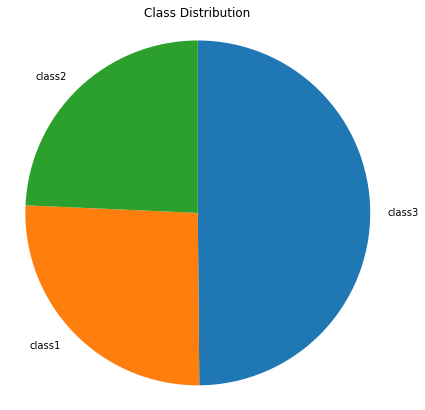

In [28]:
# we can see the same result in a pie chart too
sorted_counts = df['Pclass'].value_counts()
plt.pie(sorted_counts,labels = sorted_counts.index, startangle=90, counterclock=False);
plt.axis('square');
plt.title('Class Distribution');

Majority of people are from class 3

## Number of siblings / spouses aboard the Titanic Distribution

majority doesn't have siblings

In [29]:
df['Number of siblings'].value_counts()

0    469
1    183
2     25
4     18
3     12
5      5
Name: Number of siblings, dtype: int64

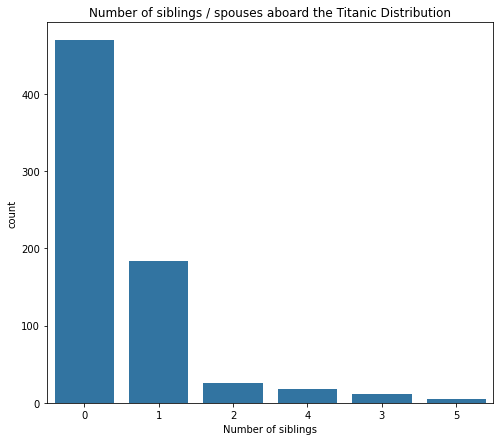

In [30]:
# plting the count or frequency of the SibSp column
color_base = sb.color_palette()[0]
sb.countplot(data = df, x='Number of siblings', color = color_base, order = df['Number of siblings'].value_counts().index);

plt.title('Number of siblings / spouses aboard the Titanic Distribution');

majority doesn't have siblings

## Number of parents / children aboard the Titanic Distribution 

In [31]:
df['Number of parents/children'].value_counts()

0    519
1    110
2     68
3      5
5      5
4      4
6      1
Name: Number of parents/children, dtype: int64

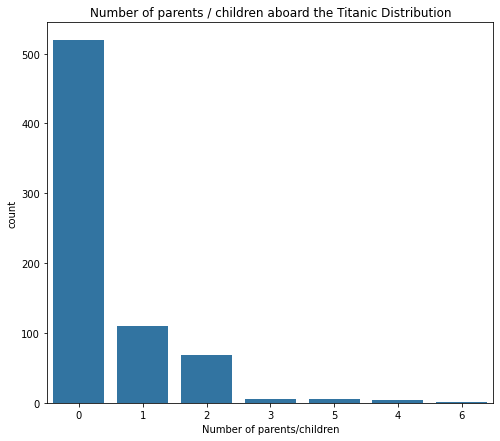

In [32]:
# plting the count or frequency of the Parch column
color_base = sb.color_palette()[0]
sb.countplot(data = df, x='Number of parents/children', color = color_base, order = df['Number of parents/children'].value_counts().index);

plt.title('Number of parents / children aboard the Titanic Distribution');

majority doesn't have parents or childern

# Multivariate Relationships
in this section i'm analysing the multivariate relationships to help answering the questions

## Does higher classes have higher chances of surviving ?

Yes

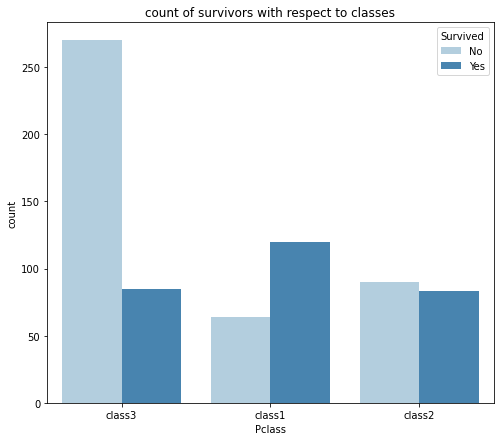

In [33]:
colormap = sb.color_palette("Blues",2)
sb.countplot(data = df, x = 'Pclass', hue = 'Survived',palette=colormap);
plt.title('count of survivors with respect to classes');

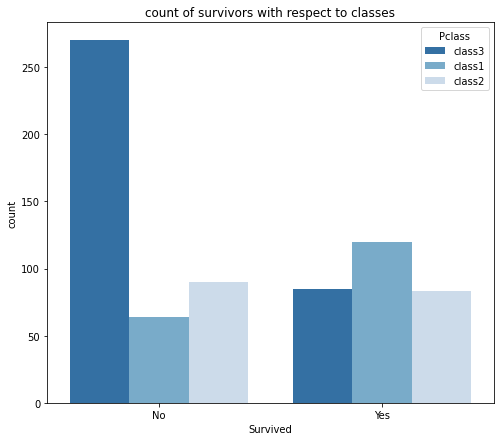

In [34]:
# tweeking the last graph so its easyer to reed
colormap = sb.color_palette("Blues_r",3)
sb.countplot(data = df, hue = 'Pclass', x = 'Survived', palette=colormap);
plt.title('count of survivors with respect to classes');

- we can see that the highst class class1 has the highst surviving rate, while the lowest class class3 has the lowest survivng rate
- majority of people in class3 didn't survived

## Who have more chance of survivng, men or women ?

okay, this has surprised me. it seems like women have higher chance of survivng.

most men didn't make it out alive :'

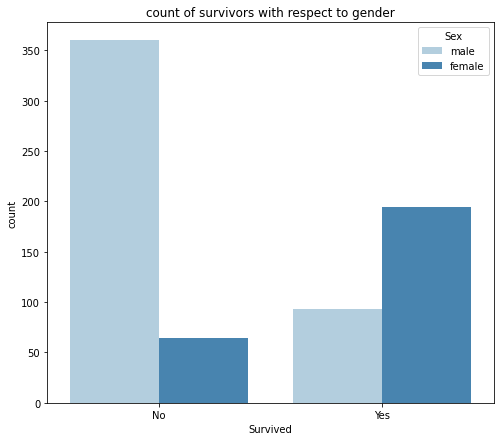

In [35]:
colormap = sb.color_palette("Blues",2)
sb.countplot(data = df, hue = 'Sex', x = 'Survived',palette=colormap );
plt.title('count of survivors with respect to gender');

## Does solo travellers have less chances of survivng ?
solo travellers have the most surviving records and not surviving too. 60% of survivors were solo travellers, 69.81% of people who didn't make it out alive were solo travellers.

but only 40.5% total survived, and 59.5% died. 
**so yes, solo travellers have less chances of survivng**

having family 

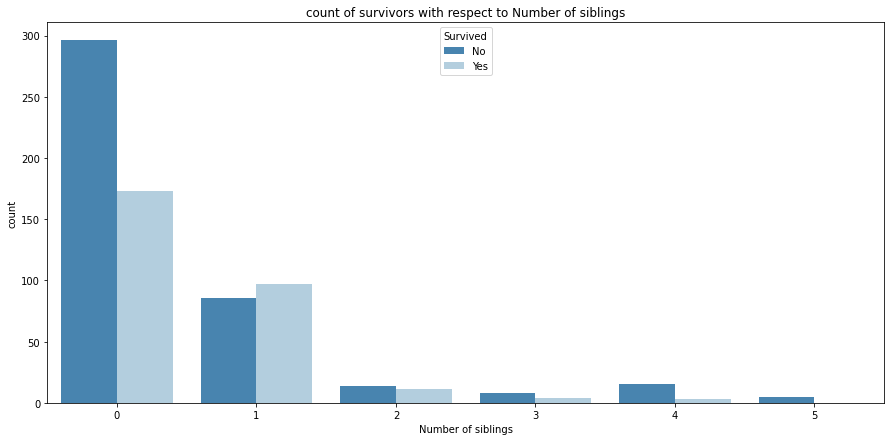

In [36]:
plt.subplots(figsize=(15,7))

colormap = sb.color_palette("Blues_r",2)
sb.countplot(data = df, x = 'Number of siblings', hue = 'Survived', palette=colormap);
plt.title('count of survivors with respect to Number of siblings');


posx and posy should be finite values
posx and posy should be finite values


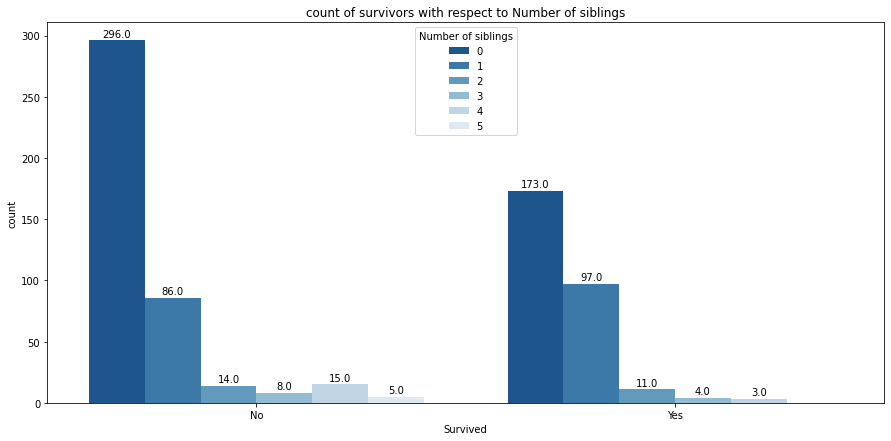

In [37]:
plt.subplots(figsize=(15,7))

colormap = sb.color_palette("Blues_r",6)
fig = sb.countplot(data = df, hue = 'Number of siblings', x = 'Survived', palette=colormap);
plt.title('count of survivors with respect to Number of siblings');

for i in fig.patches:
    height = i.get_height()
    fig.text(i.get_x()+i.get_width()/2., height + 3,height ,ha="center");

In [38]:
# Claculating nnumber of survivors and not survivors
survived_num = df[df['Survived'] == 'Yes'].shape[0]
not_survived_num = df[df['Survived'] == 'No'].shape[0]

In [39]:
# Claculating number of solo travellers
solo_num = df[df['Number of siblings'] == 0].shape[0]
print(solo_num)
print(df.shape[0] - solo_num)

469
243


In [40]:
# calculationg % of survivors and not
survived_perc = (survived_num/df.shape[0])*100
not_survived_perc = (not_survived_num/df.shape[0])*100
print(survived_perc)
print(not_survived_perc)

40.44943820224719
59.55056179775281


In [41]:
# crating two columns, one for survivors, and other one for not
df['Survived_yes']= df[df['Survived'] == 'Yes']['Survived']
df['Survived_no']= df[df['Survived'] == 'No']['Survived']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Number of siblings,Number of parents/children,Ticket,Fare,Embarked,Survived_yes,Survived_no
0,1,No,class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,No
1,2,Yes,class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Yes,NaN
2,3,Yes,class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Yes,NaN
3,4,Yes,class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Yes,NaN
4,5,No,class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,No


posx and posy should be finite values
posx and posy should be finite values


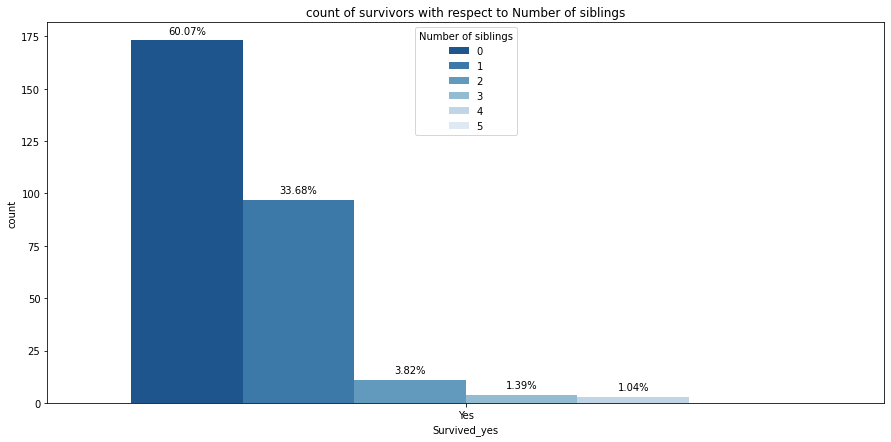

In [42]:
plt.subplots(figsize=(15,7))

colormap = sb.color_palette("Blues_r",6)
fig = sb.countplot(data = df, hue = 'Number of siblings', x = 'Survived_yes', palette=colormap);
plt.title('count of survivors with respect to Number of siblings');

for i in fig.patches:
    height = i.get_height()
    fig.text(i.get_x()+i.get_width()/2., height + 3,str(round((height/survived_num)*100,2))+'%' ,ha="center");

**60% of survivors were solo travellers**

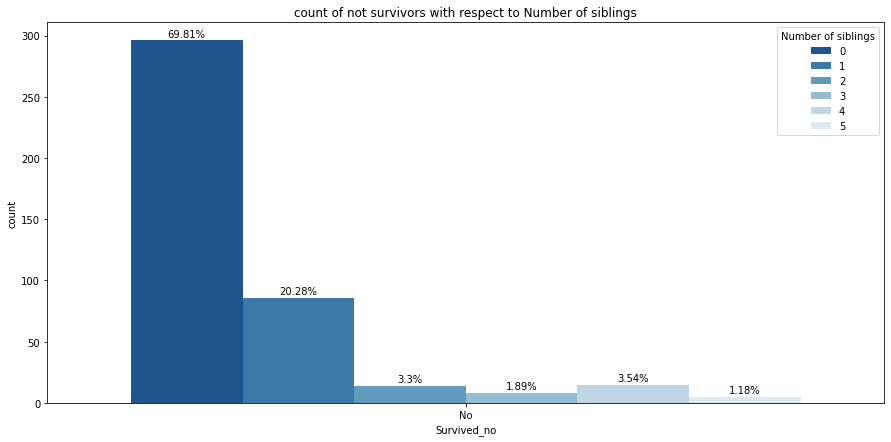

In [43]:
plt.subplots(figsize=(15,7))

colormap = sb.color_palette("Blues_r",6)
fig = sb.countplot(data = df, hue = 'Number of siblings', x = 'Survived_no', palette=colormap);
plt.title('count of not survivors with respect to Number of siblings');

for i in fig.patches:
    height = i.get_height()
    fig.text(i.get_x()+i.get_width()/2., height + 3, str(round((height/not_survived_num)*100,2))+'%' ,ha="center");

**we can see now that 60% of survivors were solo travellers, and 69.81% of people who didn't make it out alive were solo travellers**

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


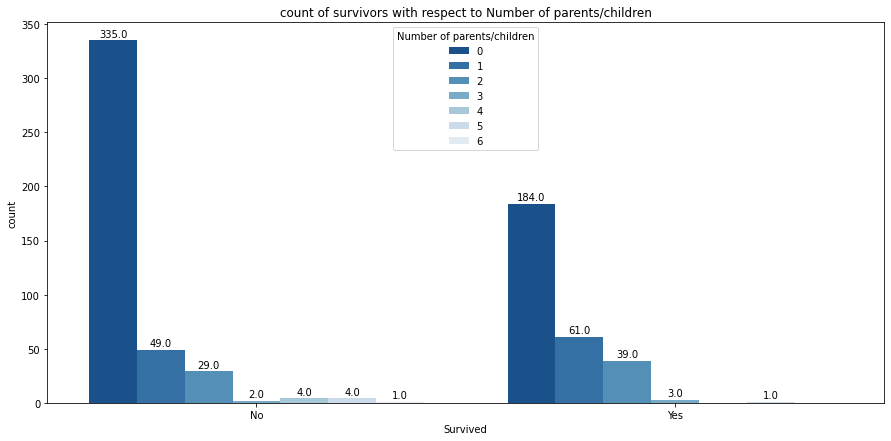

In [44]:
plt.subplots(figsize=(15,7))

colormap = sb.color_palette("Blues_r",7)
fig = sb.countplot(data = df, hue = 'Number of parents/children', x = 'Survived', palette=colormap);
plt.title('count of survivors with respect to Number of parents/children');

for i in fig.patches:
    height = i.get_height()
    fig.text(i.get_x()+i.get_width()/2, height + 3,height ,ha="center");

**Number of parents/children shares the same trend too**

## Do yenger people have more chance of survivng ?
yes

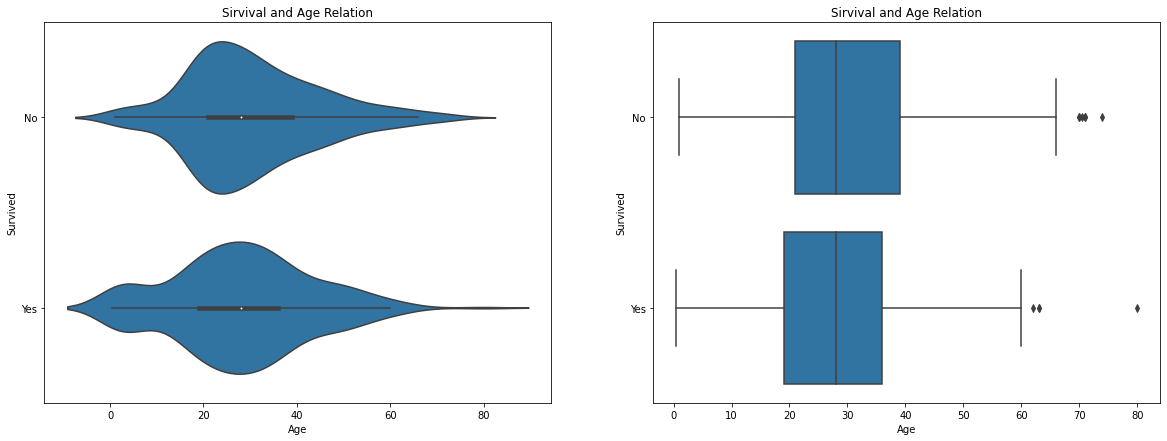

In [45]:
plt.subplots(figsize=(20,7))

# LEFT plot: violin plot
plt.subplot(1, 2, 1)

base_color = sb.color_palette()[0]

sb.violinplot(data=df, y='Survived', x='Age', color=base_color, innner='quartile');
plt.title('Sirvival and Age Relation');


# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df, y='Survived', x='Age', color=base_color);
plt.title('Sirvival and Age Relation');

## Do wealthier people have more chance of surviving ?
yes, as wealthier people are in higher classes

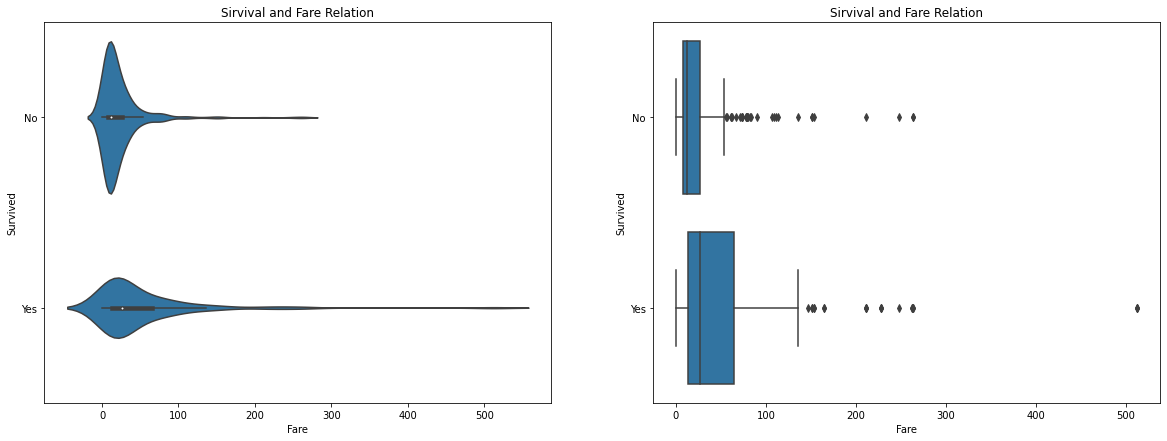

In [46]:
plt.subplots(figsize=(20,7))

# LEFT plot: violin plot
plt.subplot(1, 2, 1)

base_color = sb.color_palette()[0]

sb.violinplot(data=df, y='Survived', x='Fare', color=base_color, innner='quartile');
plt.title('Sirvival and Fare Relation');


# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df, y='Survived', x='Fare', color=base_color);
plt.title('Sirvival and Fare Relation');

**Yes wealthier people have more chance of surviving, as wealthier people are in higher classes**

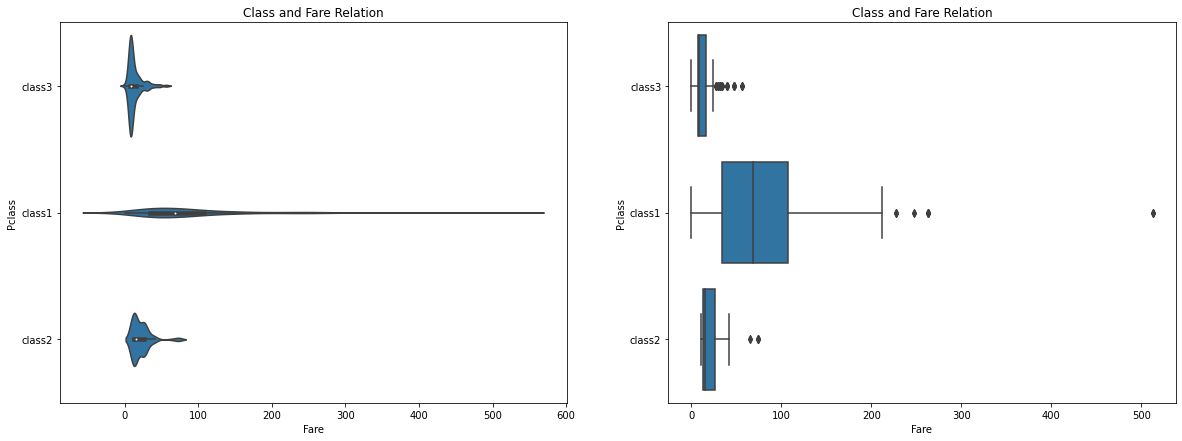

In [47]:
plt.subplots(figsize=(20,7))

# LEFT plot: violin plot
plt.subplot(1, 2, 1)

base_color = sb.color_palette()[0]

sb.violinplot(data=df, y='Pclass', x='Fare', color=base_color, innner='quartile');
plt.title('Class and Fare Relation');

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df, y='Pclass', x='Fare', color=base_color);
plt.title('Class and Fare Relation');

## Age and Fare heat map

majority of people are with low badjet and with ages between 17 and 35

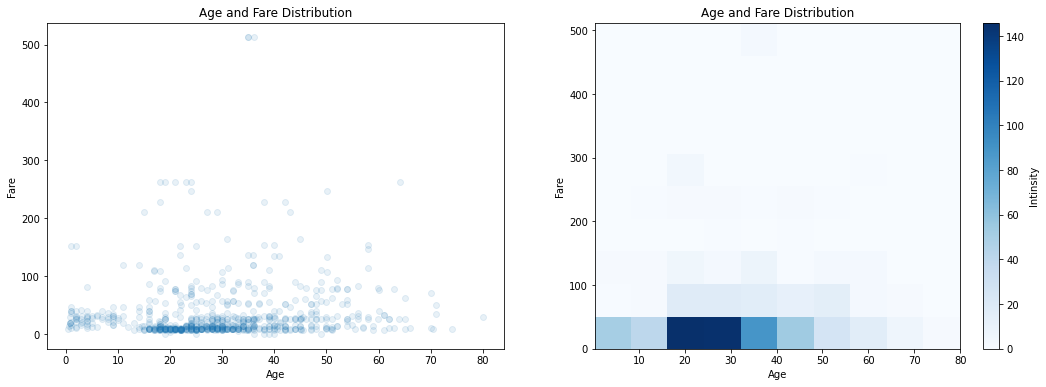

In [48]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'Age', y = 'Fare', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Age')
plt.ylabel('Fare');
plt.title('Age and Fare Distribution');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'Age', y = 'Fare', cmap='Blues')
plt.colorbar(label = 'Intinsity');
plt.xlabel('Age')
plt.ylabel('Fare');
plt.title('Age and Fare Distribution');


majority of people are with low badjet and with ages between 17 and 35

## Survived People with Respect to Their Age and Fare Distributions

c:\users\eslam\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


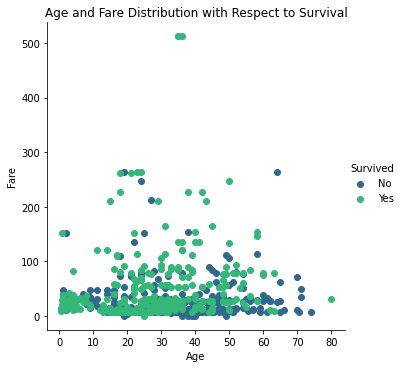

In [49]:
g = sb.FacetGrid(data = df, hue = 'Survived', size = 5,
                 palette = 'viridis');
g.map(plt.scatter, 'Age', 'Fare');
g.add_legend();

plt.title('Age and Fare Distribution with Respect to Survival');



## Number of Siblings with Respect to Age and Fare Distributions

The lower the siblings number the lower the fare aproximatly

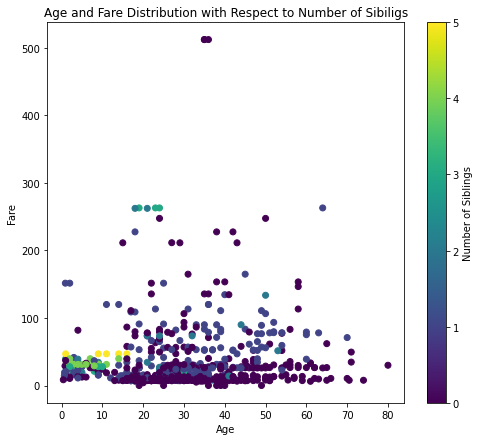

In [50]:
plt.scatter(data = df, x = 'Age', y = 'Fare', c = 'Number of siblings')
plt.colorbar(label = 'Number of Siblings');
plt.xlabel('Age');
plt.ylabel('Fare');
plt.title('Age and Fare Distribution with Respect to Number of Sibiligs');

The lower the siblings number the lower the fare aproximatly

## Number of Siblings with Respect to Age and Fare and Survival Distributions

c:\users\eslam\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


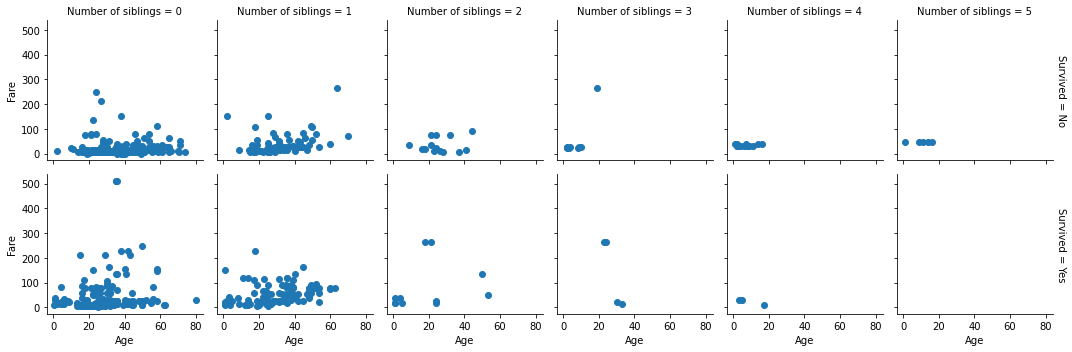

In [51]:
g = sb.FacetGrid(data = df, col = 'Number of siblings', row = 'Survived', size = 2.5,
                margin_titles =True)
g.map(plt.scatter, 'Age', 'Fare')

## Age and Fare Distibution with respect to Gender and Survival 

c:\users\eslam\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


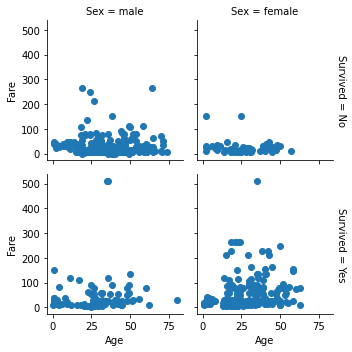

In [52]:
g = sb.FacetGrid(data = df, col = 'Sex', row = 'Survived', size = 2.5,
                margin_titles =True)
g.map(plt.scatter, 'Age', 'Fare')

Most women who survived were with high fare